# 1. Install and Import Dependencies

In [ ]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

In [ ]:
# Install paddle OCR
!pip install paddleocr

In [1]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 20884, done.
remote: Counting objects: 100% (466/466), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 20884 (delta 289), reused 249 (delta 141), pack-reused 20418
Receiving objects: 100% (20884/20884), 136.06 MiB | 37.28 MiB/s, done.
Resolving deltas: 100% (14039/14039), done.


In [16]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

# 2. Instantiate Model and Detect

In [17]:
# Setup model
ocr_model = PaddleOCR(lang='en')

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.2.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.2.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='en', layout_path_model='l

# Image processing and *crop*

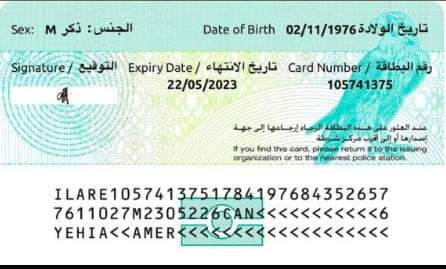

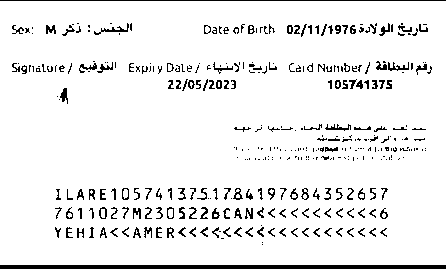

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
origianl_image_path="/content/card.jpeg"#@param {type:"string"}

origianl_image = cv2.imread(origianl_image_path)
img = cv2.cvtColor(origianl_image, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
cv2.imwrite("card_threshold.png",thresh1)
cv2_imshow(origianl_image)
cv2_imshow( thresh1)


In [19]:
from google.colab import files
Download_iamge_path="/content/card_threshold.png"#@param {type:"string"}
files.download(Download_iamge_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#visit this website and upload "card_threshold.png" and click on show image and copy the region x1,y1 and x2,y2. Then paste in the coordinate in next shell
<br>

https://www.image-map.net/


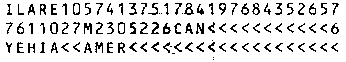

In [20]:
# @title ##**For croping image enter the four co-ordinate** { display-mode: "form" }

coordinate="49,185,395,247"#@param {type:"string"}
image_path="/content/card_threshold.png"#@param {type:"string"}
co=coordinate.split(",")
x1=int(co[0])
y1=int(co[1])
x2=int(co[2])
y2=int(co[3])
image=cv2.imread(image_path)
cropped = image[y1:y2, x1:x2]
filename ='card_crop.png'
cv2.imwrite(filename, cropped) 
cv2_imshow(cropped)

In [21]:
img_path ="/content/card_crop.png"#@param {type:"string"}

In [22]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2021/08/27 08:04:59] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/08/27 08:04:59] root DEBUG: dt_boxes num : 3, elapse : 0.013074874877929688
[2021/08/27 08:04:59] root DEBUG: rec_res num  : 3, elapse : 0.022841691970825195


In [25]:
result

[[[[5.0, 2.0], [337.0, 3.0], [337.0, 16.0], [5.0, 15.0]],
  ('ILARE105741375.1784197684352657', 0.992166)],
 [[[6.0, 22.0], [337.0, 22.0], [337.0, 35.0], [6.0, 35.0]],
  ('7611027M2305226cANd<<<<<<<<<<6', 0.93766415)],
 [[[4.0, 41.0], [337.0, 40.0], [337.0, 53.0], [4.0, 54.0]],
  ('EHIA<<AMER<<<<X<<<<<<<<<<<<<<', 0.9489814)]]

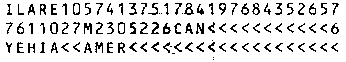

ILARE105741375.1784197684352657
7611027M2305226cANd<<<<<<<<<<6
EHIA<<AMER<<<<X<<<<<<<<<<<<<<


In [32]:
cv2_imshow(cropped)
for res in result:
    print(res[1][0]) 

# 3. Visualise Results

In [27]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [28]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [29]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

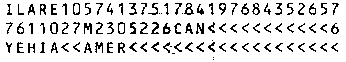

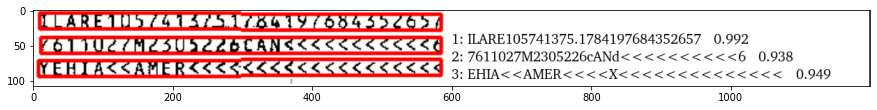

In [31]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

In [12]:
img.shape

(62, 346, 3)